In [1]:
import pandas as pd
from LDA import LDA
from NB import NB
from QDA import QDA
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
def plot_boxplots(X: np.array, y: np.array, n_experiments: int):
    data = []
    for i in range(n_experiments):
        X_train, X_test, y_train, y_test = train_test_split(X, y)
        for name, mode_type in [('LDA', LDA), ('QDA', QDA), ('NB', NB)]:
            model = mode_type()
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            acc = np.sum(y_pred == y_test) / y_test.shape[0]
            data.append({'Model': name, 'Accuracy': acc})
    
    plt.figure(figsize=(12, 6))
    ax = sns.boxplot(x='Model', y='Accuracy', data=pd.DataFrame(data))

In [115]:
# https://www.openml.org/search?type=data&status=active&id=43387
with open('oranges_grapefruits', 'r') as file:
    og_lines = file.readlines()[16:]
    og_lines = [x.rstrip().split(',') for x in og_lines]
    og_lines = [[x[0], float(x[1]), float(x[2]), float(x[3]), float(x[4]), float(x[5])] for x in og_lines]
og_df = pd.DataFrame(og_lines)
X_og = og_df.iloc[:, 1:].to_numpy()
y_og = (og_df.iloc[:, 0] == 'orange').to_numpy().astype(int)

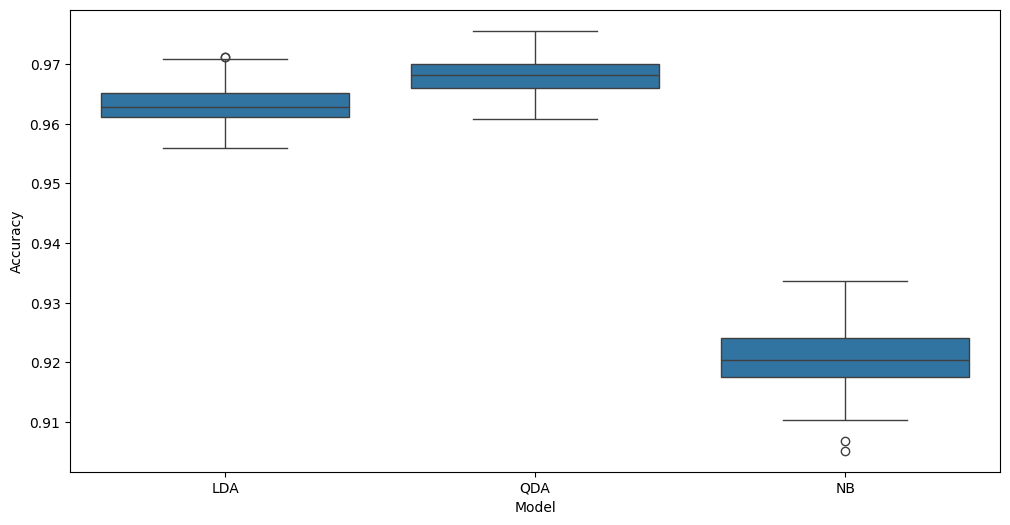

In [118]:
plot_boxplots(X_og, y_og, 100)

In [43]:
# https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic
wdbc_columns = [
    'id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 
    'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean', 
    'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 
    'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave_points_se', 
    'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 
    'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave_points_worst', 
    'symmetry_worst', 'fractal_dimension_worst'
]
wdbc_df = pd.read_csv('wdbc.data', names=wdbc_columns)
wdbc_df.drop(columns=['id'], inplace=True)
X_wdbc = wdbc_df.iloc[:, 1:].to_numpy()
y_wdbc = (wdbc_df.iloc[:, 0] == 'M').to_numpy().astype(int)

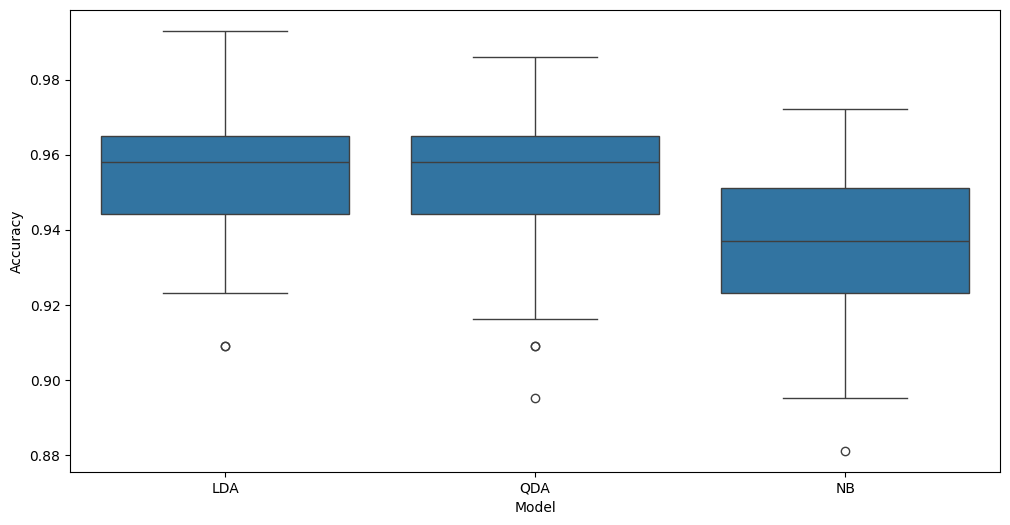

In [44]:
plot_boxplots(X_wdbc, y_wdbc, 100)

In [45]:
# https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients
df_credit = pd.read_excel('default_of_credit_card_clients.xls', header=1)
X_credit = df_credit.iloc[:, 1:-1].to_numpy()
y_credit = df_credit.iloc[:, -1].to_numpy()

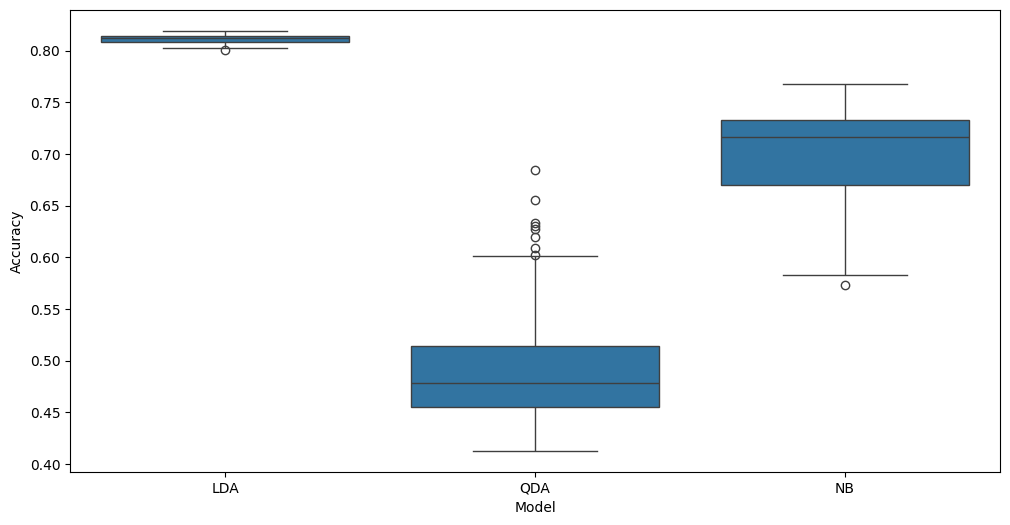

In [46]:
plot_boxplots(X_credit, y_credit, 100)